<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#References

http://rstudio-pubs-static.s3.amazonaws.com/256588_57b585da6c054349825cba46685d8464.html

https://cran.r-project.org/web/packages/easyPubMed/vignettes/getting_started_with_easyPubMed.html

http://r-statistics.co/Association-Mining-With-R.html

https://blog.revolutionanalytics.com/2019/02/sequential-pattern-mining-in-r.html

In [ ]:
version

In [2]:
install.packages("easyPubMed")
install.packages("tm")
install.packages("qdap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘data.table’, ‘openNLPdata’, ‘rJava’, ‘zip’, ‘bitops’, ‘plyr’, ‘qdapDictionaries’, ‘qdapRegex’, ‘qdapTools’, ‘chron’, ‘gender’, ‘gridExtra’, ‘igraph’, ‘openNLP’, ‘openxlsx’, ‘plotrix’, ‘RCurl’, ‘reshape2’, ‘stringdist’, ‘venneuler’, ‘wordcloud’, ‘XML’




In [3]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("arulesSequences")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(easyPubMed)
library(arules)
library(arulesSequences)
library(dplyr)
years <- c(2020, 2019, 2018, 2017, 2016)
xx <-list()
datalist <- list()
i<-0
for (year in 1:5)
{
  my_query <- paste("((", years[year], "[Date - Create]))", sep = "")
  print(my_query)
  my_entrez_id <- get_pubmed_ids(my_query)
  my_abstracts_xml <- fetch_pubmed_data(my_entrez_id,retstart = 0,  format = "xml", retmax = 100)
  my_PM_list <- articles_to_list(pubmed_data = my_abstracts_xml)
  xx <- lapply(my_PM_list, article_to_df, autofill = TRUE, max_chars = 50)
  full_df <- do.call(rbind, xx)
  datalist[[year]] <- full_df[seq(1, 100, by = 1), c("year", "month", "title", "day")]
  # full_df <- do.call(rbind, xx)
  # print(full_df)
  # df_years[[i]] <- full_df[seq(1, 100, by = 1), c("year", "month", "title")]
}
all_years = do.call(rbind, datalist)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "((2020[Date - Create]))"
[1] "((2019[Date - Create]))"
[1] "((2018[Date - Create]))"
[1] "((2017[Date - Create]))"
[1] "((2016[Date - Create]))"


In [6]:
all_years <- unique(all_years)
all_years

,year,month,title,day
,<chr>,<chr>,<chr>,<chr>
1,2020,11,Characterization of a method to study urodynamics and bladder nociception in male and female mice.,17
4,2020,11,Association between frailty and changes in lifestyle and physical or psychological conditions among older adults affected by the coronavirus disease 2019 countermeasures in Japan.,17
8,2020,11,Ketamine as a rescue treatment for severe acute behavioural disturbance: A prospective prehospital study.,17
15,2020,11,Editorial Comment to Supine extraperitoneal laparoscopic nephroureterectomy without patient repositioning.,17
16,2020,11,"Mechanically assisted walking training for walking, participation, and quality of life in children with cerebral palsy.",17
19,2020,11,Reply.,17
26,2020,11,Is tomosynthesis an ingenious scheme for bronchoscopic diagnosis of lung nodules?,17
27,2020,11,Regulating antimicrobial sales in Saudi Arabia; Achievements and Challenges.,17
32,2020,11,A Modified VATS Procedure for Treating Adult Intralobar Pulmonary Sequestration.,17


In [7]:
#reindex
row.names(all_years) <- NULL


#Sequence Mining

In [ ]:
# group articles by year month and day
grouped_years <- all_years %>%
  group_by(year,month, day) %>%
  summarize(
    eventID = as.numeric(paste(year, month, day, sep="")),
    SIZE = n(),
    combined_title = paste(as.character(title), collapse = ' ')
  )
unique_groups = unique(grouped_years)
unique_groups

`summarise()` regrouping output by 'year', 'month', 'day' (override with `.groups` argument)



year,month,day,eventID,SIZE,combined_title
<chr>,<chr>,<chr>,<dbl>,<int>,<chr>
2017,07,07,20170707,1,Drug-dependent functionalization of wild-type and mutant p53 in cisplatin-resistant human ovarian tumor cells.
2017,08,01,20170801,1,Induced cancer stem cells generated by radiochemotherapy and their therapeutic implications.
2017,10,05,20171005,4,"Inhibition of ALDH2 by O-GlcNAcylation contributes to the hyperglycemic exacerbation of myocardial ischemia/reperfusion injury. Gene expression changes in tumor free tongue tissue adjacent to tongue squamous cell carcinoma. Secreted heat shock protein 90 promotes prostate cancer stem cell heterogeneity. Prognostic impact of immune microenvironment in laryngeal and pharyngeal squamous cell carcinoma: Immune cell subtypes, immuno-suppressive pathways and clinicopathologic characteristics."
2017,10,13,20171013,1,Selective Brain Cooling after Traumatic Brain Injury: Effects of Three Different Cooling Methods-Case Report.
2018,02,20,20180220,1,Hypoxia-inducible factor prolyl hydroxylase 2 (PHD2) is a direct regulator of epidermal growth factor receptor (EGFR) signaling in breast cancer.
2018,03,02,20180302,3,"Polyunsaturated fatty acids ameliorate aging via redox-telomere-antioncogene axis. Variation of lifespan in multiple strains, and effects of dietary restriction and BmFoxO on lifespan in silkworm, Bombyx mori. Viral-host interaction in kidney reveals strategies to escape host immunity and persistently shed virus to the urine."
2018,03,13,20180313,1,Activity of the aqueous extract of Schinus terebinthifolius Raddi on strains of the Candida genus.
2018,03,20,20180320,1,Readability of Online Sources Regarding Meniscal Tears.
2018,04,03,20180403,1,Single-Site Robotic Radical Hysterectomy and Sentinel Lymphnode Biopsy in Cervical Cancer: A Case Report.


In [ ]:
# Generate a vector of corpus
library(tm)
text_vec <- VectorSource(unique_groups$combined_title)
vec_corpus <- VCorpus(text_vec)


In [ ]:
# Clean corpus
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, stopwords("en"))
  print(corpus)
    return(corpus)
}
# Apply your customized function to the tweet_corp: clean_corp
clean_corp <- clean_corpus(vec_corpus)
clean_corp

In [ ]:
#Regenerate the data frame from the corpus
dataframe<-data.frame(text=unlist(sapply(clean_corp, `[`, "content")), stringsAsFactors=F)
dataframe$sequenceID<-unique_groups$year
dataframe$eventID<-unique_groups$eventID
dataframe$SIZE<-unique_groups$SIZE
dataframe <- dataframe[order(dataframe$sequenceID, dataframe$eventID),]

# change column order 
dataframe<-dataframe[,c(2,3,1)]
dataframe

In [ ]:
# Convert to transaction matrix data type
write.table(dataframe, "mytxtout.txt", sep=" ", row.names = FALSE, col.names = FALSE, quote = FALSE)
trans_matrix <- read_baskets("mytxtout.txt", sep = " ", info = c("sequenceID","eventID"))

inspect(head(trans_matrix))

    items                       sequenceID  eventID
[1] {,                                             
     cells,                                        
     cisplatinresistant,                           
     drugdependent,                                
     functionalization,                            
     human,                                        
     mutant,                                       
     ovarian,                                      
     p,                                            
     tumor,                                        
     wildtype}                        2017 20170707
[2] {,                                             
     cancer,                                       
     cells,                                        
     generated,                                    
     implications,                                 
     induced,                                      
     radiochemotherapy,                            
     stem,  

In [ ]:
# Run CSPADE algorithm for sequence analysis
library(arulesSequences)
frequent_pattern <-cspade(trans_matrix,parameter = list(support = 0.5), control = list(verbose = TRUE))


parameter specification:
support : 0.5
maxsize :  10
maxlen  :  10

algorithmic control:
bfstype  : FALSE
verbose  :  TRUE
summary  : FALSE
tidLists : FALSE

preprocessing ... 1 partition(s), 0.01 MB [0.031s]
mining transactions ... 4.43 MB [0.38s]
reading sequences ... [12s]

total elapsed time: 11.942s


In [ ]:
as(frequent_pattern, "data.frame")

sequence,support
<chr>,<dbl>
<{}>,1.00
<{activity}>,0.50
<{acute}>,0.50
<{adults}>,0.50
<{analysis}>,0.50
<{associated}>,0.50
<{based}>,0.50
<{brain}>,0.50
<{breast}>,0.50


#Association Mining

Loading required package: qdapDictionaries

Loading required package: qdapRegex


Attaching package: ‘qdapRegex’


The following object is masked from ‘package:dplyr’:

    explain


Loading required package: qdapTools


Attaching package: ‘qdapTools’


The following object is masked from ‘package:dplyr’:

    id


Loading required package: RColorBrewer


Attaching package: ‘qdap’


The following object is masked from ‘package:dplyr’:

    %>%


The following object is masked from ‘package:Matrix’:

    %&%


The following objects are masked from ‘package:base’:

    Filter, proportions




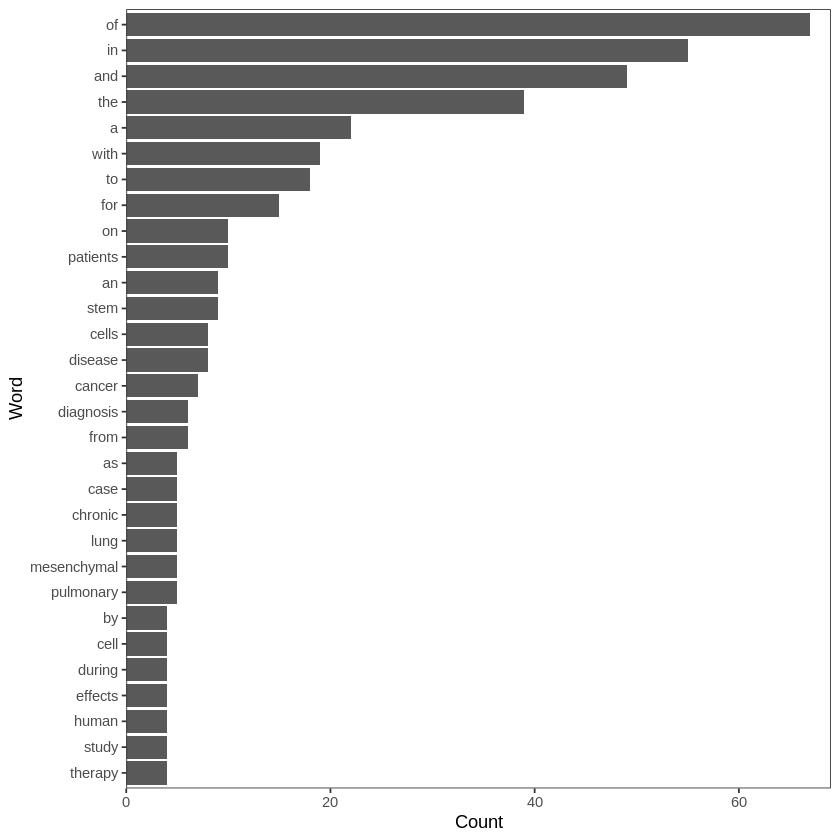

In [8]:

library(qdap)
frequent_terms <- freq_terms(all_years$title, 30)
plot(frequent_terms)

In [22]:
library(tm)
text_vec <- VectorSource(all_years$title)
vec_corpus <- VCorpus(text_vec)


In [23]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, stopwords("en"))
  print(corpus)
    return(corpus)
}
# Apply your customized function to the tweet_corp: clean_corp
clean_corp <- clean_corpus(vec_corpus)
clean_corp

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 100


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 100

In [24]:
# Create the dtm from the corpus: 
pubmed_dtm <- DocumentTermMatrix(clean_corp)
# Print out tweets_dtm data
pubmed_dtm

<<DocumentTermMatrix (documents: 100, terms: 711)>>
Non-/sparse entries: 888/70212
Sparsity           : 99%
Maximal term length: 25
Weighting          : term frequency (tf)

In [25]:
# Since the sparsity is so high, i.e. a proportion of cells with 0s/ cells with other values is too large,
# let's remove some of these low frequency terms
pubmed_dtm_rm_sparse <- removeSparseTerms(pubmed_dtm, 0.98)
# Convert to a matrix: 
pubmed_m <- as.matrix(pubmed_dtm_rm_sparse)
# Print the dimensions
dim(pubmed_m)
# Review a portion of the matrix
# pubmed_m[0:10, 0:100]

[1] 100  30

ERROR: ignored

In [42]:
library(arules)
library(tm)
rules <- apriori (pubmed_m, parameter = list(supp = 0.001, conf = 0.5))
summary(rules)

Warning message in asMethod(object):
“matrix contains values other than 0 and 1! Setting all entries != 0 to 1.”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 100 transaction(s)] done [0.00s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [572 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 572 rules

rule length distribution (lhs + rhs):sizes
  2   3   4   5   6   7 
 22 195 190 116  42   7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   3.969   5.000   7.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01000   Min.   :0.5000   Min.   :0.01000   Min.   : 5.00  
 1st Qu.:0.01000   1st Qu.:1.0000   1st Qu.:0.01000   1st Qu.:12.50  
 Median :0.01000   Median :1.0000   Median :0.01000   Median :20.00  
 Mean   :0.01163   Mean   :0.9378   Mean   :0.01334   Mean   :20.70  
 3rd Qu.:0.01000   3rd Qu.:1.0000   3rd Qu.:0.01000   3rd Qu.:33.33  
 Max.   :0.07000   Max.   :1.0000   Max.   :0.09000   Max.   :33.33  
     count      
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.163  
 3rd Qu.:1.000  
 Max.   :7.000  

mining info:
     data ntransactions support confidence
 pubmed_m           100   0.001        0.5

In [46]:
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
summary(rules_conf)
arules::inspect(rules_conf)

set of 572 rules

rule length distribution (lhs + rhs):sizes
  2   3   4   5   6   7 
 22 195 190 116  42   7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   3.969   5.000   7.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.01000   Min.   :0.5000   Min.   :0.01000   Min.   : 5.00  
 1st Qu.:0.01000   1st Qu.:1.0000   1st Qu.:0.01000   1st Qu.:12.50  
 Median :0.01000   Median :1.0000   Median :0.01000   Median :20.00  
 Mean   :0.01163   Mean   :0.9378   Mean   :0.01334   Mean   :20.70  
 3rd Qu.:0.01000   3rd Qu.:1.0000   3rd Qu.:0.01000   3rd Qu.:33.33  
 Max.   :0.07000   Max.   :1.0000   Max.   :0.09000   Max.   :33.33  
     count      
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.163  
 3rd Qu.:1.000  
 Max.   :7.000  

mining info:
     data ntransactions support confidence
 pubmed_m           100   0.001        0.5

      lhs                                           rhs           support
[1]   {therapeutic}                              => {stem}        0.03   
[2]   {human}                                    => {cells}       0.04   
[3]   {mesenchymal}                              => {stem}        0.05   
[4]   {cancer,cell}                              => {stem}        0.01   
[5]   {cell,stem}                                => {cancer}      0.01   
[6]   {management,therapy}                       => {chronic}     0.01   
[7]   {chronic,management}                       => {therapy}     0.01   
[8]   {chronic,therapy}                          => {management}  0.01   
[9]   {effect,human}                             => {mesenchymal} 0.01   
[10]  {effect,mesenchymal}                       => {human}       0.01   
[11]  {effect,human}                             => {cells}       0.01   
[12]  {cells,effect}                             => {human}       0.01   
[13]  {effect,human}                  

In [48]:
rules_lift <- sort (rules, by="lift", decreasing=TRUE) # 'high-lift' rules.

arules::inspect(rules_lift)

      lhs                                           rhs           support
[1]   {chronic,therapy}                          => {management}  0.01   
[2]   {cancer,case}                              => {report}      0.01   
[3]   {patients,therapy}                         => {influence}   0.01   
[4]   {influence,model}                          => {mice}        0.01   
[5]   {influence,mice}                           => {model}       0.01   
[6]   {disease,influence}                        => {model}       0.01   
[7]   {disease,model}                            => {influence}   0.01   
[8]   {disease,influence}                        => {mice}        0.01   
[9]   {disease,mice}                             => {influence}   0.01   
[10]  {chronic,disease}                          => {review}      0.01   
[11]  {chronic,patients}                         => {review}      0.01   
[12]  {lung,pulmonary}                           => {review}      0.01   
[13]  {cancer,pulmonary}              

In [17]:
pubmed.tran<-as(data.frame(dataframe$text),"transactions")
transactionInfo(pubmed.tran)$sequenceID<-unique_groups$year
transactionInfo(pubmed.tran)$eventID<-unique_groups$eventID
transactionInfo(pubmed.tran)$SIZE<-unique_groups$SIZE
inspect(pubmed.tran)

ERROR: ignored